# Binomial Distribution - Waiting Time

> This document is written in *R*.
>
> ***GitHub***: https://github.com/czs108

## Background

> Suppose in a certain call centre, phone calls arrive at an *average* rate of **6** per *minute*. This means that the probability of a call arriving in any given *second* must be **0.1**.
>
> Simulate this process using a *Binomial Distribution* with a sample size of **60**. Each member of the sample represents a *second*.
>
> If a phone call arrives during a particular second then the corresponding member will be **1**. If no phone call arrives during a particular second, then the corresponding member will be **0**.

## Question A

> Use the function `sample` to generate a sample of **60** *seconds*.

In [1]:
res <- sample(x=c(1, 0), size=60, replace=TRUE, prob=c(0.1, 0.9))

for (i in c(1:6)) {
    end <- i * 10
    idx <- c((end - 9):end)
    print(res[idx])
}

 [1] 0 1 0 0 0 0 0 0 0 0
 [1] 0 0 0 1 0 0 0 0 0 0
 [1] 0 0 0 0 0 0 0 0 0 0
 [1] 0 0 0 1 0 0 0 0 0 0
 [1] 0 0 0 1 0 0 0 0 0 0
 [1] 0 0 0 0 0 0 0 0 0 0


## Question B

> In order to simulate a distribution, we need to generate a large number of samples.
>
> You can do this using a `for` loop. At each iteration you should record the value of $X$, the number phone calls arriving in the sample.

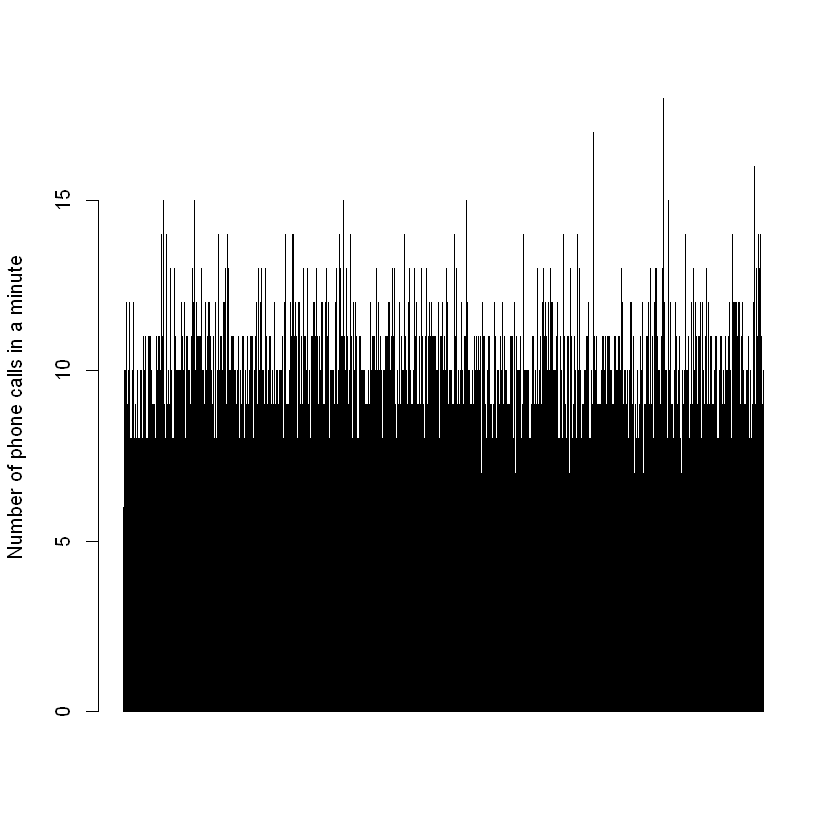

In [2]:
trials <- 10000
phones <- c(rep(0, trials))
for (i in c(1:trials)) {
    res <- sample(x=c(1, 0), size=60, replace=TRUE, prob=c(0.1, 0.9))
    phones[i] <- sum(res)
}

barplot(phones, ylab="Number of phone calls in a minute")

## Question C

> Use the `table` function to compute the distribution over the different values of $X$.
>
> Plot the distribution using the `plot` function.

In [3]:
probs <- prop.table(table(phones))
probs

phones
     0      1      2      3      4      5      6      7      8      9     10 
0.0011 0.0109 0.0382 0.0866 0.1370 0.1673 0.1679 0.1452 0.1047 0.0695 0.0354 
    11     12     13     14     15     16     17     18 
0.0203 0.0090 0.0043 0.0018 0.0005 0.0001 0.0001 0.0001 

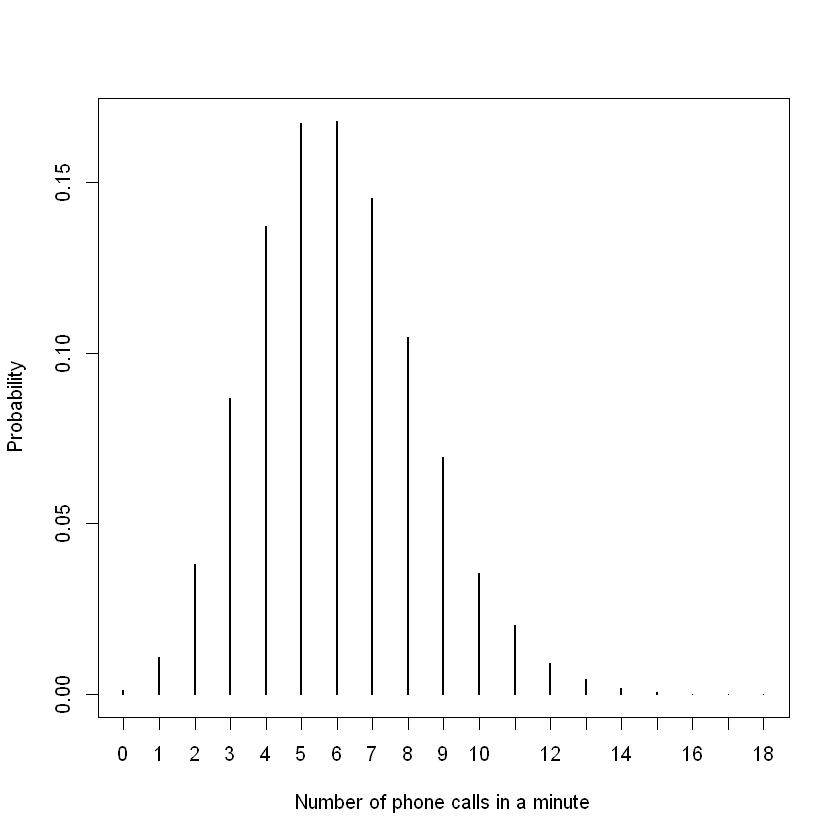

In [4]:
plot(probs, xlab="Number of phone calls in a minute", ylab="Probability")

## Question D

> Compute the true distribution using the formula for the *Binomial Distribution*.
>
> Plot the true distribution using the `points` function.

In [5]:
p <- 0.1
phones <- c(0:60)

probs.true <- choose(n=60, k=phones) * (p ^ phones) * (1 - p) ^ (60 - phones)
probs.true

[1] 1.797010e-03 1.198007e-02 3.926800e-02 8.435349e-02 1.335597e-01
 [6] 1.662076e-01 1.692855e-01 1.451019e-01 1.068111e-01 6.857009e-02
[11] 3.885639e-02 1.962444e-02 8.903680e-03 3.652792e-03 1.362549e-03
[16] 4.642761e-04 1.450863e-04 4.172416e-05 1.107493e-05 2.720158e-06
[21] 6.195916e-07 1.311305e-07 2.582874e-08 4.741507e-09 8.122026e-10
[26] 1.299524e-10 1.943733e-11 2.719626e-12 3.561415e-13 4.366486e-14
[31] 5.013373e-15 5.390723e-16 5.428159e-17 5.117456e-18 4.515402e-19
[36] 3.726999e-20 2.875771e-21 2.072628e-22 1.393872e-23 8.736522e-25
[41] 5.096304e-26 2.762225e-27 1.388420e-28 6.457766e-30 2.772273e-31
[46] 1.095219e-32 3.968185e-34 1.313347e-35 3.952203e-37 1.075429e-38
[51] 2.628827e-40 5.727292e-42 1.101402e-43 1.847216e-45 2.660599e-47
[56] 3.224968e-49 3.199373e-51 2.494638e-53 1.433700e-55 5.400000e-58
[61] 1.000000e-60

Use the `dbinom` function directly.

In [6]:
dbinom(x=c(0:5), prob=p, size=60)

[1] 0.00179701 0.01198007 0.03926800 0.08435349 0.13355969 0.16620761

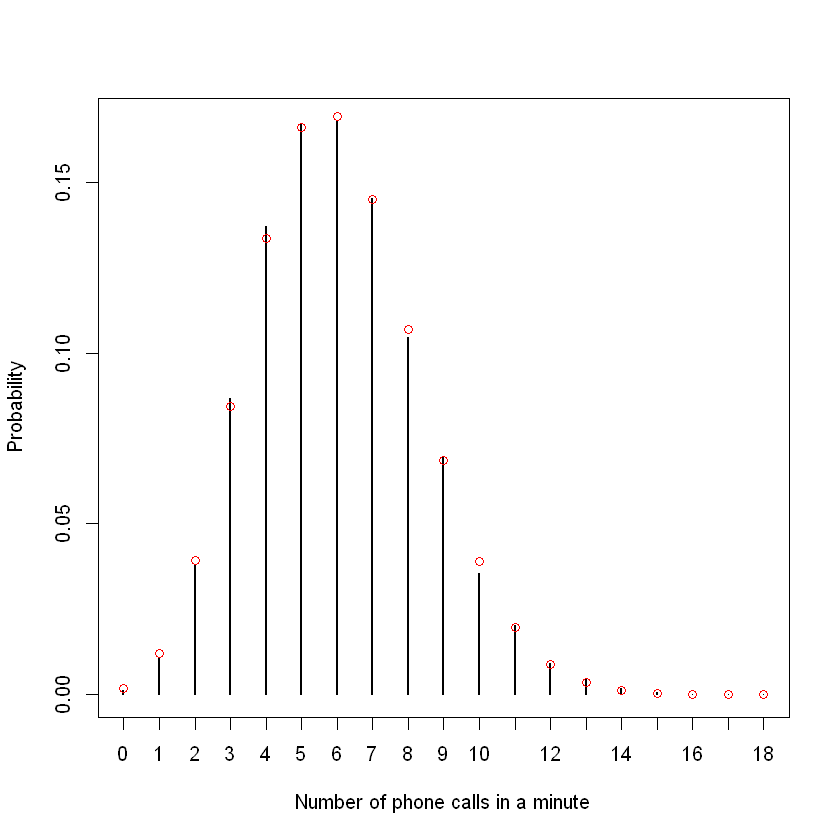

In [7]:
plot(probs, xlab="Number of phone calls in a minute", ylab="Probability")
points(probs.true ~ phones, col="red")

## Question E

> Compute the distribution over the possible waiting times for the *1st* call.

It's a *Geometric Distribution*.

In [8]:
seconds <- c(0:60)

probs.time <- (1 - p) ^ seconds * p
probs.time

[1] 0.1000000000 0.0900000000 0.0810000000 0.0729000000 0.0656100000
 [6] 0.0590490000 0.0531441000 0.0478296900 0.0430467210 0.0387420489
[11] 0.0348678440 0.0313810596 0.0282429536 0.0254186583 0.0228767925
[16] 0.0205891132 0.0185302019 0.0166771817 0.0150094635 0.0135085172
[21] 0.0121576655 0.0109418989 0.0098477090 0.0088629381 0.0079766443
[26] 0.0071789799 0.0064610819 0.0058149737 0.0052334763 0.0047101287
[31] 0.0042391158 0.0038152042 0.0034336838 0.0030903154 0.0027812839
[36] 0.0025031555 0.0022528400 0.0020275560 0.0018248004 0.0016423203
[41] 0.0014780883 0.0013302795 0.0011972515 0.0010775264 0.0009697737
[46] 0.0008727964 0.0007855167 0.0007069650 0.0006362685 0.0005726417
[51] 0.0005153775 0.0004638398 0.0004174558 0.0003757102 0.0003381392
[56] 0.0003043253 0.0002738927 0.0002465035 0.0002218531 0.0001996678
[61] 0.0001797010

Use the `dgeom` function directly.

In [9]:
dgeom(x=c(0:5), prob=p)

[1] 0.100000 0.090000 0.081000 0.072900 0.065610 0.059049

The `pgeom` function can calculate the *cumulative* probability.

In [10]:
pgeom(q=5, prob=p)

[1] 0.468559

In [11]:
sum(dgeom(x=c(0:5), prob=p))

[1] 0.468559

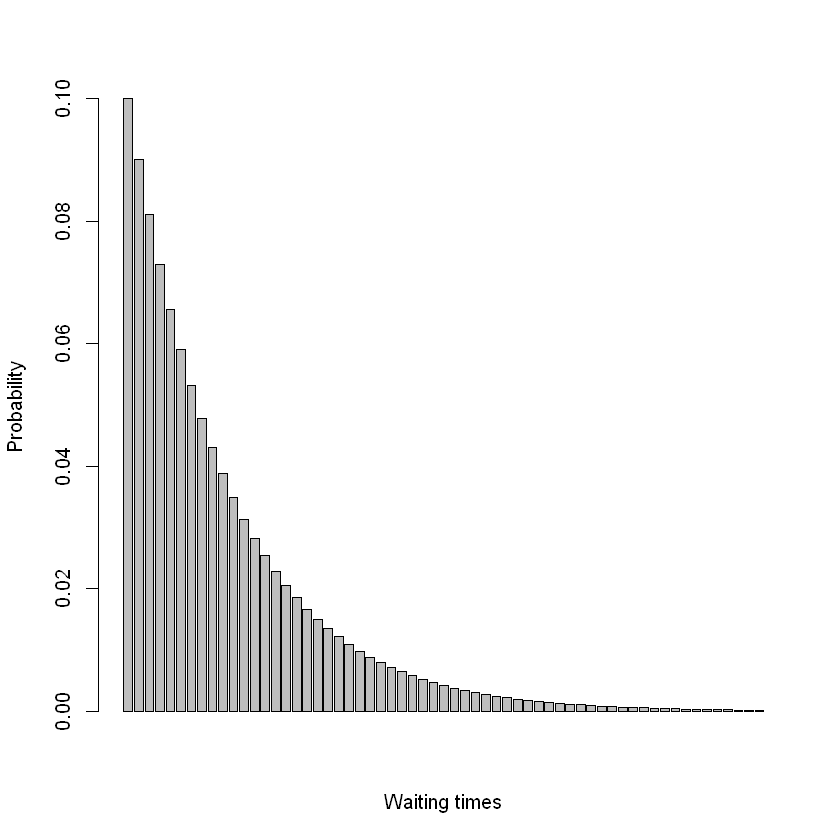

In [12]:
barplot(probs.time, xlab="Waiting times", ylab="Probability")

## Question F

> What's the *mean* waiting time for the *1st* call?

\begin{equation}
E\; (Times) = \frac{1}{p} = 10
\end{equation}

In [13]:
mean <- sum(seconds * probs.time)
mean

[1] 8.886788